In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
import re


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_fake = pd.read_csv('/content/drive/MyDrive/news/Fake.csv')

In [5]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
df_fake['subject'].value_counts()

subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64

<Axes: xlabel='subject', ylabel='count'>

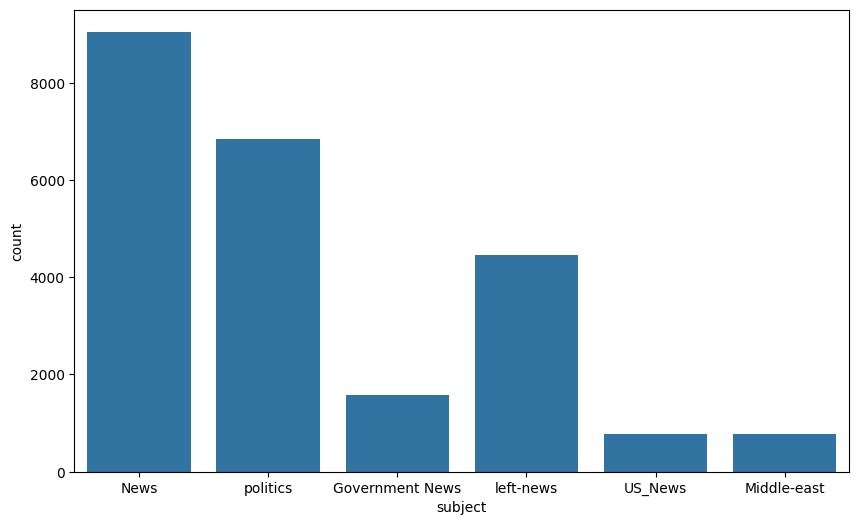

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x = 'subject', data = df_fake)

In [8]:
# Dropping unneccesary features
df_fake=df_fake.drop(['subject','date'],axis=1)


In [9]:
df_fake.head()

,title,text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...


In [10]:
# Assigning label 'FAKE' by creating target column i.e., label
df_fake['label'] ='FAKE'
df_fake.head()

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,FAKE
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,FAKE
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",FAKE
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",FAKE
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,FAKE


In [11]:
df_fake.text.shape

(23481,)

**Wordcloud**

In [12]:
text = ' '.join(df_fake['text'].tolist())
' '.join(['This','is', 'the', 'data'])

'This is the data'

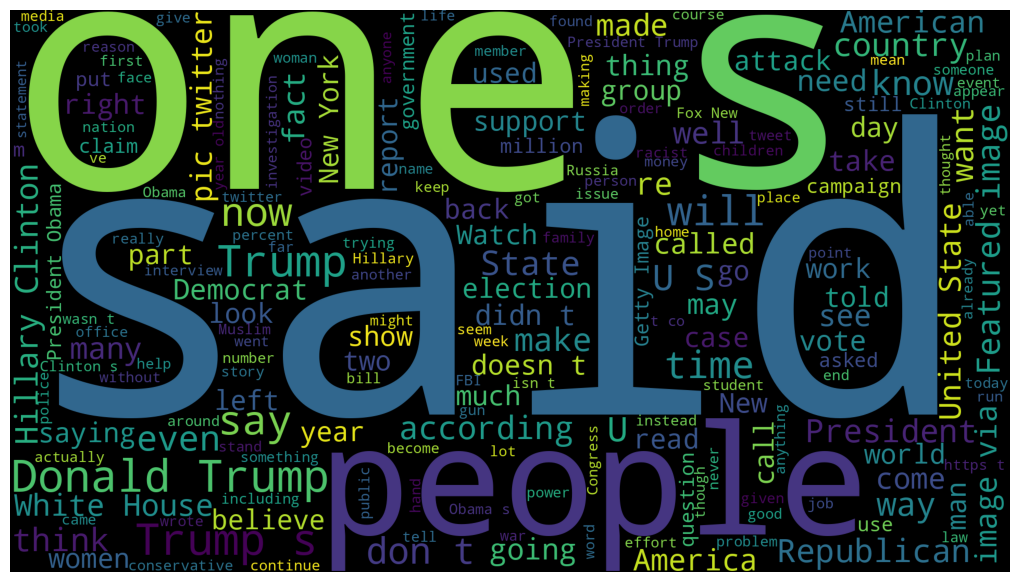

In [13]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [14]:
df_true = pd.read_csv('/content/drive/MyDrive/news/True.csv')
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [15]:
df_true['subject'].value_counts()

subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64

<Axes: xlabel='subject', ylabel='count'>

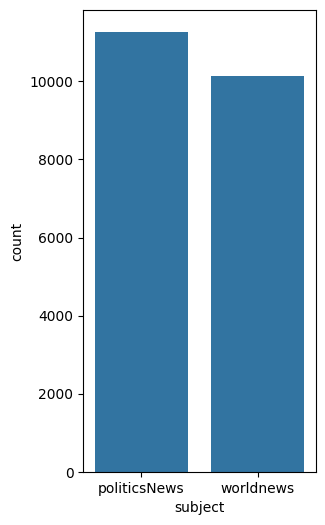

In [16]:
plt.figure(figsize=(3, 6))
sns.countplot(x = 'subject', data = df_true)

In [17]:
df_true=df_true.drop(['subject','date'],axis=1)
df_true['label']='TRUE'
df_true.head()

,title,text,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,TRUE
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,TRUE
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,TRUE
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,TRUE
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,TRUE


In [18]:
data_train = pd.concat([df_true, df_fake], ignore_index=True)
data_train.head()

,title,text,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,TRUE
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,TRUE
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,TRUE
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,TRUE
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,TRUE


In [19]:
data_train.shape

(44898, 3)

In [20]:
text = ' '.join(df_true['text'].tolist())
' '.join(['This','is', 'the', 'data'])

'This is the data'

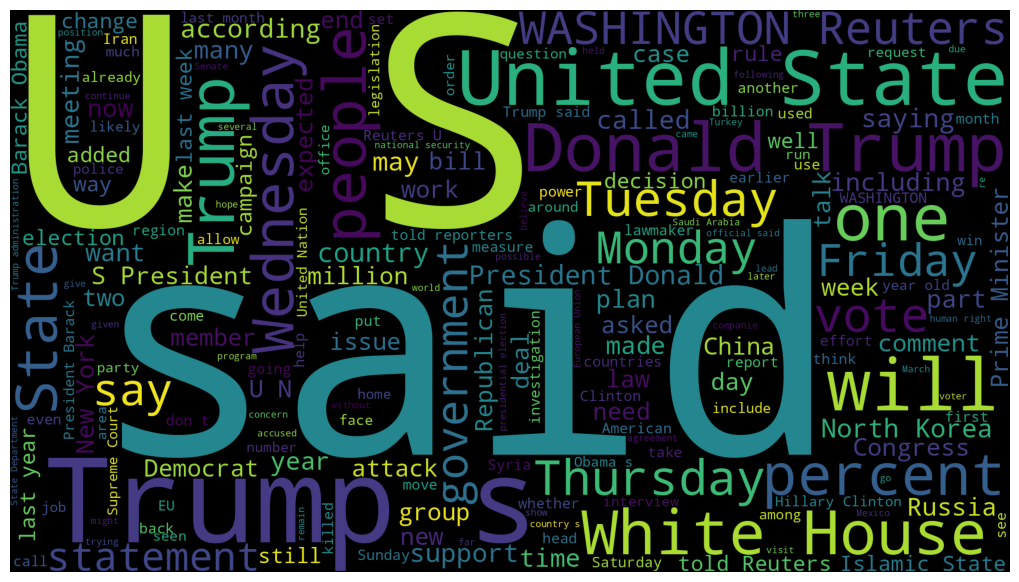

In [21]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Preprocessing Text

In [22]:
df_fake['label'] = 'FAKE'
df_fake.head()

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,FAKE
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,FAKE
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",FAKE
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",FAKE
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,FAKE


In [23]:
df_true['label']='TRUE'

In [24]:
df_true.head()

,title,text,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,TRUE
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,TRUE
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,TRUE
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,TRUE
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,TRUE


In [25]:
data_train = pd.concat([df_true, df_fake], ignore_index=True)
data_train.head()

,title,text,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,TRUE
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,TRUE
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,TRUE
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,TRUE
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,TRUE


In [26]:
#Shuffling the dataset
data_train=data_train.reindex(np.random.permutation(data_train.index))
data_train.head()

,title,text,label
21952,Watch Arnold Schwarzenegger Take On Nazis And...,Arnold Schwarzenegger has a message for both D...,FAKE
15399,Catalonia protest strike closes down roads in ...,BARCELONA (Reuters) - A strike called across C...,TRUE
10527,Security logs of Clinton email server show no ...,WASHINGTON (Reuters) - Computer security recor...,TRUE
14811,Iran quake survivors complain of slow aid effo...,ANKARA (Reuters) - Exhausted and exposed to fr...,TRUE
9445,Some in Oklahoma statehouse urge Obama impeach...,OKLAHOMA CITY (Reuters) - Republican state law...,TRUE


In [27]:
data_train.shape

(44898, 3)

In [28]:
data_train.to_csv('Fake_news.csv')

In [29]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import nltk, re, string
from string import punctuation
from nltk.corpus import stopwords
from sklearn import metrics
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Dense, Embedding, Input,LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from keras.preprocessing.text import Tokenizer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [30]:
import tensorflow as tf
tf.__version__
! sudo pip3 install keras
from tensorflow.python.keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from keras.models import Model
from keras.preprocessing.text import Tokenizer

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
df = pd.read_csv('/content/Fake_news.csv')
df.head()

,Unnamed: 0,title,text,label
0,21952,Watch Arnold Schwarzenegger Take On Nazis And...,Arnold Schwarzenegger has a message for both D...,FAKE
1,15399,Catalonia protest strike closes down roads in ...,BARCELONA (Reuters) - A strike called across C...,TRUE
2,10527,Security logs of Clinton email server show no ...,WASHINGTON (Reuters) - Computer security recor...,TRUE
3,14811,Iran quake survivors complain of slow aid effo...,ANKARA (Reuters) - Exhausted and exposed to fr...,TRUE
4,9445,Some in Oklahoma statehouse urge Obama impeach...,OKLAHOMA CITY (Reuters) - Republican state law...,TRUE


In [33]:
import re
# Function for extracting desired text using regex
def extract_txt(text):
    regex = re.search(r"(?<=\(Reuters\)\s\-\s).*",text)
    if regex:
        return regex.group(0)
    return text
    #Applying regex function to retain only relevant text
df['text_processed'] = df['text'].apply(extract_txt)
df.head()

,Unnamed: 0,title,text,label,text_processed
0,21952,Watch Arnold Schwarzenegger Take On Nazis And...,Arnold Schwarzenegger has a message for both D...,FAKE,Arnold Schwarzenegger has a message for both D...
1,15399,Catalonia protest strike closes down roads in ...,BARCELONA (Reuters) - A strike called across C...,TRUE,A strike called across Catalonia by pro-indepe...
2,10527,Security logs of Clinton email server show no ...,WASHINGTON (Reuters) - Computer security recor...,TRUE,Computer security records turned over to the F...
3,14811,Iran quake survivors complain of slow aid effo...,ANKARA (Reuters) - Exhausted and exposed to fr...,TRUE,"Exhausted and exposed to freezing cold, surviv..."
4,9445,Some in Oklahoma statehouse urge Obama impeach...,OKLAHOMA CITY (Reuters) - Republican state law...,TRUE,Republican state lawmakers in Oklahoma have in...


In [34]:
#Checking dataframe containing only True News
df[df.label=="TRUE"]

,Unnamed: 0,title,text,label,text_processed
1,15399,Catalonia protest strike closes down roads in ...,BARCELONA (Reuters) - A strike called across C...,TRUE,A strike called across Catalonia by pro-indepe...
2,10527,Security logs of Clinton email server show no ...,WASHINGTON (Reuters) - Computer security recor...,TRUE,Computer security records turned over to the F...
3,14811,Iran quake survivors complain of slow aid effo...,ANKARA (Reuters) - Exhausted and exposed to fr...,TRUE,"Exhausted and exposed to freezing cold, surviv..."
4,9445,Some in Oklahoma statehouse urge Obama impeach...,OKLAHOMA CITY (Reuters) - Republican state law...,TRUE,Republican state lawmakers in Oklahoma have in...
6,17935,"Russia, China call for restraint after Trump c...",MOSCOW (Reuters) - Russia and China called for...,TRUE,Russia and China called for restraint on North...
...,...,...,...,...,...
44890,6205,Under Secretary of State Shannon meets Tillers...,WASHINGTON (Reuters) - U.S. Under Secretary of...,TRUE,U.S. Under Secretary of State for Political Af...
44891,6113,Ethics lawyers to sue Trump over foreign payments,(Reuters) - A group including former White Hou...,TRUE,A group including former White House ethics at...
44894,2592,Trump aide Greenblatt heading to Jordan for ta...,WASHINGTON (Reuters) - U.S. President Donald T...,TRUE,U.S. President Donald Trump’s Middle East envo...
44896,8305,Maine governor says will not resign amid racis...,(Reuters) - Maine Governor Paul LePage said on...,TRUE,Maine Governor Paul LePage said on Wednesday h...


In [35]:
# Drop extra column
df = df.drop(['text','Unnamed: 0'],axis=1)
df["label"] = df.label.apply(lambda  x:0 if x=='TRUE' else 1)
df.head()

,title,label,text_processed
0,Watch Arnold Schwarzenegger Take On Nazis And...,1,Arnold Schwarzenegger has a message for both D...
1,Catalonia protest strike closes down roads in ...,0,A strike called across Catalonia by pro-indepe...
2,Security logs of Clinton email server show no ...,0,Computer security records turned over to the F...
3,Iran quake survivors complain of slow aid effo...,0,"Exhausted and exposed to freezing cold, surviv..."
4,Some in Oklahoma statehouse urge Obama impeach...,0,Republican state lawmakers in Oklahoma have in...


In [36]:
#Combining text_processed and title for creating full news article with headline
df['final_news'] = df['title'] + " " + df['text_processed']
df.head()

,title,label,text_processed,final_news
0,Watch Arnold Schwarzenegger Take On Nazis And...,1,Arnold Schwarzenegger has a message for both D...,Watch Arnold Schwarzenegger Take On Nazis And...
1,Catalonia protest strike closes down roads in ...,0,A strike called across Catalonia by pro-indepe...,Catalonia protest strike closes down roads in ...
2,Security logs of Clinton email server show no ...,0,Computer security records turned over to the F...,Security logs of Clinton email server show no ...
3,Iran quake survivors complain of slow aid effo...,0,"Exhausted and exposed to freezing cold, surviv...",Iran quake survivors complain of slow aid effo...
4,Some in Oklahoma statehouse urge Obama impeach...,0,Republican state lawmakers in Oklahoma have in...,Some in Oklahoma statehouse urge Obama impeach...


In [37]:
# now we can delete extra columns
cols_del =['title','text_processed']
df = df.drop(cols_del,axis=1)

df.head()

,label,final_news
0,1,Watch Arnold Schwarzenegger Take On Nazis And...
1,0,Catalonia protest strike closes down roads in ...
2,0,Security logs of Clinton email server show no ...
3,0,Iran quake survivors complain of slow aid effo...
4,0,Some in Oklahoma statehouse urge Obama impeach...


In [38]:
#creating list of possible stopwords from nltk library
stop = stopwords.words('english')

def cleanText(txt):
  # lowercaing
    txt = txt.lower()
  # removing stopwords
    txt = ' '.join([word for word in txt.split() if word not in (stop)])
  # removing non-alphabetic characters
    txt = re.sub('[^a-z]',' ',txt)
    return txt

In [39]:
#applying text cleaning function to clean final_news
df['final_news'] = df['final_news'].apply(cleanText)
df.head()

,label,final_news
0,1,watch arnold schwarzenegger take nazis white s...
1,0,catalonia protest strike closes roads region s...
2,0,security logs clinton email server show eviden...
3,0,iran quake survivors complain slow aid effort ...
4,0,oklahoma statehouse urge obama impeachment bat...


In [40]:
y = df['label'].values
X = df.drop(['label'],axis=1)

In [41]:
y.shape

(44898,)

In [42]:
import gensim

In [43]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2024-06-15 05:07:39--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-06-15 05:07:39--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-06-15 05:07:39--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [44]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [45]:
from gensim.scripts.glove2word2vec import glove2word2vec

In [46]:
EMBEDDING_FILE ='/content/glove.6B.50d.txt'

In [47]:
# configuration setting
MAX_SEQUENCE_LENGTH = 100
MAX_VOCAB_SIZE = 20000
EMBEDDING_DIM = 50
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 32
EPOCHS = 10

In [48]:
#Creating features and target variable
X = df.drop(['label'],axis=1)
y = df['label'].values

In [49]:
# load in pre-trained word vectors
print('Loading word vectors...')
word2vec = {}
with open(EMBEDDING_FILE) as f:
  # is just a space-separated text file in the format:
  # word vec[0] vec[1] vec[2] ...
  for line in f:
    values = line.split()
    word = values[0]
    vec = np.asarray(values[1:], dtype='float32')
    word2vec[word] = vec
print('Found %s word vectors.' % len(word2vec))

Loading word vectors...
Found 400000 word vectors.


In [50]:
# convert the sentences (strings) into integers
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(list(X['final_news']))
X = tokenizer.texts_to_sequences(list(X['final_news']))

In [51]:
# pad sequences so that we get a N x T matrix
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (44898, 100)


In [52]:
# get word -> integer mapping
word2idx = tokenizer.word_index
print('Found %s unique tokens.' % len(word2idx))

Found 115831 unique tokens.


In [53]:
# prepare embedding matrix
print('Filling pre-trained embeddings...')
num_words = min(MAX_VOCAB_SIZE, len(word2idx) + 1)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word2idx.items():
  if i < MAX_VOCAB_SIZE:
    embedding_vector = word2vec.get(word)
    if embedding_vector is not None:
      # words not found in embedding index will be all zeros.
      embedding_matrix[i] = embedding_vector

Filling pre-trained embeddings...


In [54]:
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(
  num_words,
  EMBEDDING_DIM,
  weights=[embedding_matrix],
  input_length=MAX_SEQUENCE_LENGTH,
  trainable=False
)

In [55]:
print('Building model...')

# create an LSTM network with a single LSTM
input_ = Input(shape=(MAX_SEQUENCE_LENGTH,))
x = embedding_layer(input_)
# x = LSTM(15, return_sequences=True)(x)
x = Bidirectional(LSTM(15, return_sequences=True))(x)
x = GlobalMaxPool1D()(x)
output = Dense(1, activation="sigmoid")(x)

model = Model(input_, output)
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)
model.summary()

Building model...
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 50)           1000000   
                                                                 
 bidirectional (Bidirection  (None, 100, 30)           7920      
 al)                                                             
                                                                 
 global_max_pooling1d (Glob  (None, 30)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 1007951 (3.85 MB)
Trainable p

In [56]:
# train Test split in the ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,stratify=y,random_state=0)

In [57]:
print('Training model...')
r = model.fit(
  X_train,
  y_train,
  batch_size=BATCH_SIZE,
  epochs=EPOCHS,
  validation_split=VALIDATION_SPLIT
)

Training model...
Epoch 1/10
898/898 [==============================] - 20s 15ms/step - loss: 0.2387 - accuracy: 0.9059 - val_loss: 0.1456 - val_accuracy: 0.9446
Epoch 2/10
898/898 [==============================] - 20s 22ms/step - loss: 0.1268 - accuracy: 0.9516 - val_loss: 0.1022 - val_accuracy: 0.9644
Epoch 3/10
898/898 [==============================] - 13s 14ms/step - loss: 0.0980 - accuracy: 0.9639 - val_loss: 0.0861 - val_accuracy: 0.9687
Epoch 4/10
898/898 [==============================] - 13s 14ms/step - loss: 0.0806 - accuracy: 0.9713 - val_loss: 0.0843 - val_accuracy: 0.9704
Epoch 5/10
898/898 [==============================] - 13s 15ms/step - loss: 0.0663 - accuracy: 0.9768 - val_loss: 0.0677 - val_accuracy: 0.9768
Epoch 6/10
898/898 [==============================] - 12s 14ms/step - loss: 0.0553 - accuracy: 0.9808 - val_loss: 0.0582 - val_accuracy: 0.9798
Epoch 7/10
898/898 [==============================] - 14s 15ms/step - loss: 0.0478 - accuracy: 0.9843 - val_loss: 0.05

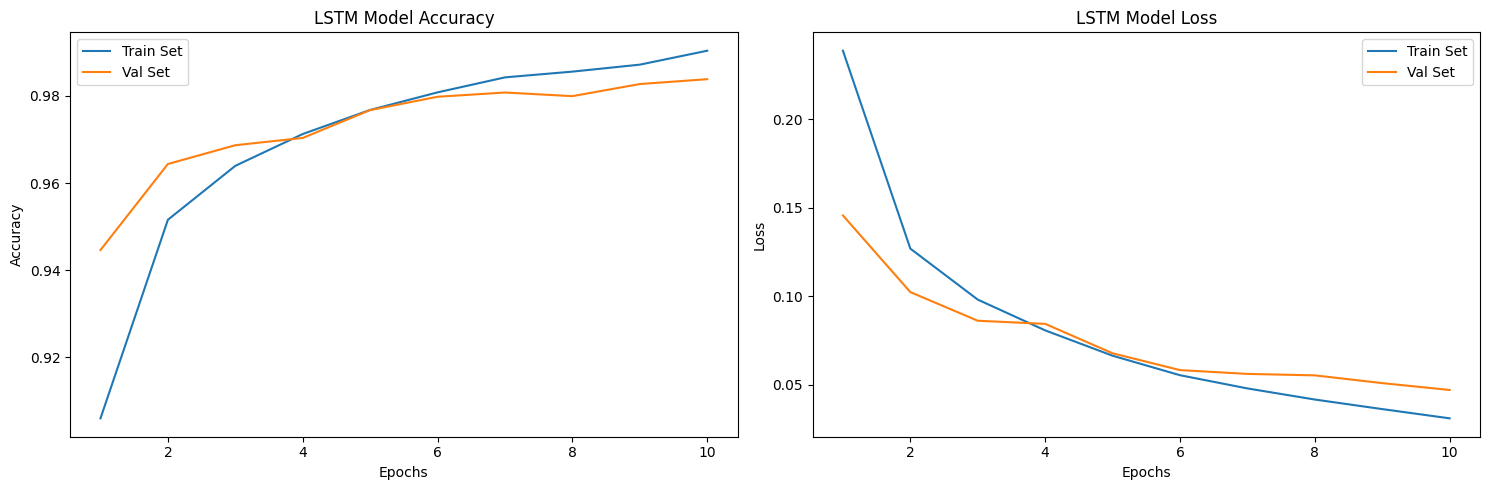

In [58]:
acc = r.history['accuracy']
val_acc = r.history['val_accuracy']
loss = r.history['loss']
val_loss = r.history['val_loss']
epochs_range = range(1, len(r.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('LSTM Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LSTM Model Loss')

plt.tight_layout()
plt.show()

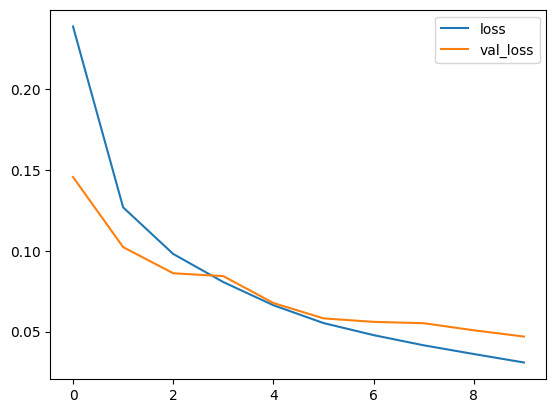

In [59]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

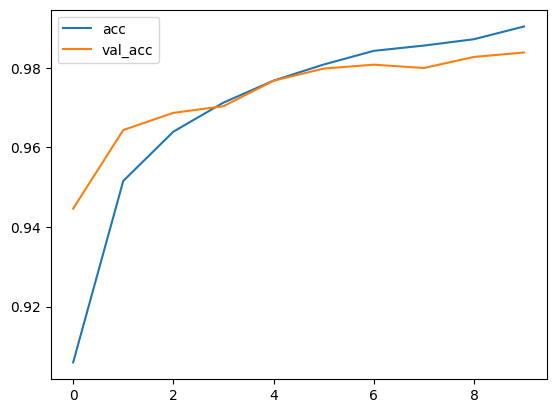

In [60]:
# Plotting accuracies
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [61]:
print("Accuracy of the model on Training Data is - " , model.evaluate(X_train,y_train)[1]*100)
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test, y_test)[1]*100)

1123/1123 [==============================] - 6s 5ms/step - loss: 0.0275 - accuracy: 0.9921
Accuracy of the model on Training Data is -  99.21209216117859
281/281 [==============================] - 2s 8ms/step - loss: 0.0479 - accuracy: 0.9833
Accuracy of the model on Testing Data is -  98.32962155342102


In [62]:
pred = model.predict(X_test)
pred[:5]

281/281 [==============================] - 3s 4ms/step


array([[9.9999785e-01],
       [1.5567537e-04],
       [9.9999249e-01],
       [9.9965692e-01],
       [9.9996412e-01]], dtype=float32)

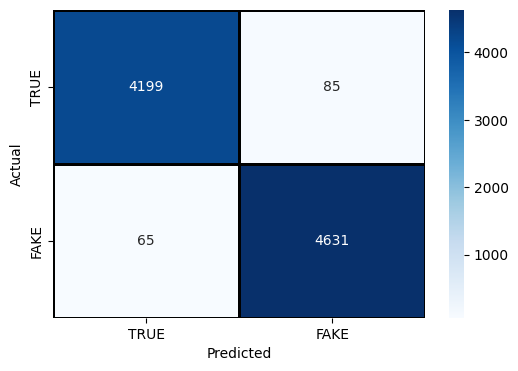

In [63]:
cm = confusion_matrix(y_test,pred.round())
cm = pd.DataFrame(cm , index = ['TRUE','FAKE'] , columns = ['TRUE','FAKE'])
plt.figure(figsize = (6,4))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['TRUE','FAKE'] , yticklabels = ['TRUE','FAKE'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [64]:
print(classification_report(y_test,pred.round()))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4284
           1       0.98      0.99      0.98      4696

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



In [65]:
y_pred = model.predict(X_test).ravel()

281/281 [==============================] - 1s 4ms/step


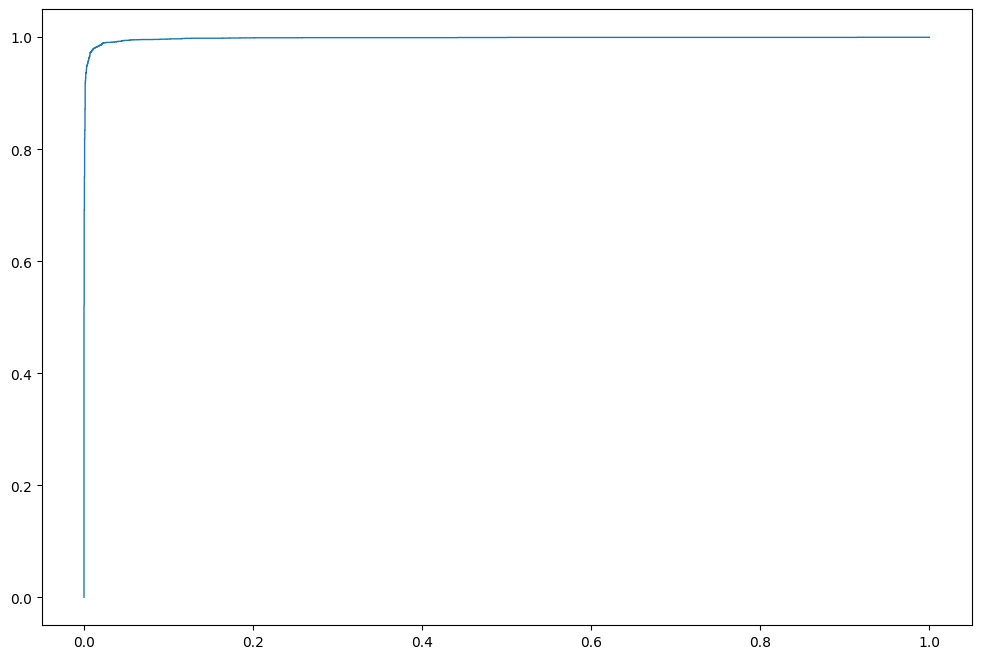

In [66]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba)))

f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test,y_pred,label='LSTM', l='-')

In [67]:
testSent =["In a big win for India, the New Delhi Declaration was adopted during the G20 Summit. Prime Minister Narendra Modi announced the adoption and said it was made possible after cooperation from all member states.There is good news, with everyone's cooperation, a consensus has been reached on the New Delhi G20 Leadership Declaration,the prime minister said." ,
       "Trey Gowdy destroys this clueless DHS employee when asking about the due process of getting on the terror watch list. Her response is priceless:  I m sorry, um, there s not a process afforded the citizen prior to getting on the list.  ","Poland s new prime minister faces a difficult balancing act trying to repair bruised relations with the European Union without alienating the eurosceptic government s core voters. A Western-educated former banker who is fluent in German and English and was sworn in on Monday, Mateusz Morawiecki boasts the credentials needed to negotiate with Brussels. But any compromises to improve relations with Brussels, which sees the ruling Law and Justice (PiS) party as a threat to democracy, would risk upsetting the traditional, Catholic supporters who propelled it into power two years ago. It is a gamble that could backfire, and it is not yet clear how far Morawiecki, 49, and his party, dominated by former Prime Minister Jaroslaw Kaczynski, are ready to go to please Brussels.   The idea to build up international credibility seems rational,  said Jaroslaw Flis, a sociologist at the Jagiellonian University.  But such actions would have to be in complete contrast with what Mateusz Morawiecki would have to do domestically to prevent the PiS from falling apart.  The PiS government has alienated many people at home and abroad with its nationalist rhetoric and changes to state institutions which the EU says subvert the bloc s laws. The European Commission, the EU executive, opened an inquiry into the rule of law in Poland in January 2016 and the European Parliament has started a process that could deprive Poland of its voting rights in the 28-nation bloc. Any hope in Brussels that Morawiecki s appointment signals a change of course by PiS will have been tempered by Polish parliament approving legal changes to the judiciary in defiance of the EU on Friday - the day after his nomination. The changes give parliament, where PiS has a majority, de facto control over the selection of judges. EU leaders looking for clues about Morawiecki s plans will also have taken little comfort from comments he has made since being nominated, making clear he backs a tough line on the EU and believes in PiS s traditional vision of the Polish state.   We want to transform Europe, this is my dream, to re-christianise it,  Morawiecki told the Catholic Radio Maryja broadcaster.  We want Poland to be strong, but also to contain ... Christian values. We will defend them against the background of laicisation and a deepening consumerism.  Asked by the radio interviewer about demands by French President Emmanuel Macron for Poland to face sanctions over a subversion of democratic rules, Morawiecki said he would not  bow down to blackmail.  In comments to parliament on Tuesday, Morawiecki suggested Poland might relent in a conflict with Brussels over logging in an ancient forest, which an EU court has said contravenes EU laws. But he said Poland s national interests came first in any debate over the future of the EU and that he  wholeheartedly  supported PiS s overhaul of the judiciary. Like Beata Szydlo, whom he replaced as prime minister, Morawiecki is likely to have to defer to PiS leader and co-founder Jaroslaw Kaczynski. Prime minister from July 2006 to November 2007, Kaczynski is widely seen as the power behind the party and Poland s main decision-maker. How much scope that will leave Morawiecki to carve out his own path remains to be seen. Former Polish President Lech Walesa, a PiS critic, has suggested that nothing of substance will change.  The circus has stayed the same, only the clowns have changed their roles,  Walesa, who led the Solidarity trade union movement that ended communist rule, said on Twitter.  The appointment of Morawiecki, whose father founded and led a radical offshoot of Solidarity in the 1980s, appears designed in part to present a new face of Poland to the EU. Szydlo, 54, at times responded angrily to EU criticism and relations with the bloc soured under her government. Underlining PiS opposition to Muslim immigration, she said last month Poland wanted to be sure Christian traditions were not subject to  ideological censorship  in the EU. Along with Hungary, Poland has refused to take in any of its quota of the wave of refugees from Syria and elsewhere who have come to Europe since 2015, on the grounds that Muslim immigrants are a threat to national security and stability.         Such comments appeal to core PiS voters, and Szydlo s government, which promised generous welfare payouts and a dedication to traditional Catholic values, was one of Poland s most popular since communist rule ended in 1989. A relative newcomer to politics, Morawiecki lacks Szydlo s broad appeal. But he has overseen significant economic achievements since becoming finance minister in 2016, a position he has retained in the new government. Tusk has welcomed what he sees as signs that Morawiecki is a liberal economist who wants better ties with the EU.  There is no doubt that (Morawiecki s) liberal bias and some pro-western gestures could be a sign that there is a lurking desire to improve relations,  Tusk said last week. But an economic stimulus plan Morawiecki unveiled in 2016 has been criticized by economists who say it depends heavily on private investment, which is low in Poland despite fast economic growth.  What Morawiecki sees as a solution, meaning more political influence in the economy, is actually dangerous,  said Leszek Balcerowicz, a former finance minister who coordinated the transition to a market economy after decades of communist rule. Any hint of protectionism is also likely to worry EU leaders, who seek to break down trade barriers.  Morawiecki has called the privatization of state-owned companies a tragedy and said he will give more power to domestic capital at the expense of foreign investors. In his comments to parliament on Tuesday, he said economic policy should not change.  ",
      ]

In [68]:
def cleanText(txt):
    txt = txt.lower()
    txt = ' '.join([word for word in txt.split() if word not in (stop)])
    txt = re.sub('[^a-z]',' ',txt)
    return txt

In [69]:
def predict_text(lst_text):
    test = tokenizer.texts_to_sequences(lst_text)
    # pad sequences so that we get a N x T matrix
    testX = pad_sequences(test, maxlen=MAX_SEQUENCE_LENGTH)
    df_test = pd.DataFrame(lst_text, columns = ['test_sent'])

    prediction = model.predict(testX)
    df_test['prediction']=prediction
    df_test["test_sent"] = df_test["test_sent"].apply(cleanText)
    df_test['prediction']=df_test['prediction'].apply(lambda x: "Fake" if x>=0.5 else "Real")
    return df_test

In [72]:
#getting the prediction by passing list of sample news articles
df_testsent = predict_text(testSent)
df_testsent

1/1 [==============================] - 0s 20ms/step


,test_sent,prediction
0,big win india new delhi declaration adopted g...,Real
1,trey gowdy destroys clueless dhs employee aski...,Fake
2,poland new prime minister faces difficult bala...,Real
